import lib

In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

In [2]:
df = pd.read_csv('data.csv (1).zip')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [5]:
X_ = df.drop(['Bankrupt?'], axis=1)
y_ = df['Bankrupt?']

In [6]:
X_.shape

(6819, 95)

In [7]:
y_.shape

(6819,)

In [8]:
confusion_matrix?

# Feature selection

##  Tree base

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_,y_)

ExtraTreesClassifier()

In [10]:
etc.feature_importances_

array([0.01851757, 0.0210579 , 0.01944392, 0.00839221, 0.00835964,
       0.00787129, 0.00989431, 0.00974285, 0.01155767, 0.0109959 ,
       0.00825994, 0.00977786, 0.00705938, 0.0126627 , 0.00622401,
       0.00958058, 0.00925815, 0.00962265, 0.01393078, 0.00668232,
       0.00774635, 0.00864125, 0.01163822, 0.00782319, 0.00768767,
       0.0066724 , 0.00678864, 0.0088939 , 0.01002381, 0.01012294,
       0.01097252, 0.00802566, 0.01024945, 0.01157261, 0.01263785,
       0.01127972, 0.02223872, 0.02191196, 0.00909899, 0.01738039,
       0.00806583, 0.00912771, 0.01814555, 0.00869876, 0.00797691,
       0.007623  , 0.01014915, 0.00812271, 0.01250773, 0.00672823,
       0.00994349, 0.00930989, 0.01160871, 0.01386565, 0.00878947,
       0.00831638, 0.00971889, 0.00874036, 0.01277243, 0.012142  ,
       0.00730735, 0.00902155, 0.00753443, 0.00939737, 0.01183557,
       0.01394753, 0.00732096, 0.01228848, 0.00916378, 0.00957154,
       0.00951766, 0.00930285, 0.00822754, 0.00858825, 0.00656

In [11]:
imp = pd.DataFrame(columns=['feature', 'important?'])
for i in range(len(X_.columns)):
    imp.loc[i] = [X_.columns[i],etc.feature_importances_[i]]
imp.sort_values('important?',ascending=False , inplace=True)

In [12]:
X_list = []
for i in range(5):
    X_list.append(imp.iloc[i,0])

In [13]:
X_list

[' Net Income to Total Assets',
 ' Debt ratio %',
 ' Net worth/Assets',
 " Net Income to Stockholder's Equity",
 ' ROA(A) before interest and % after tax']

In [14]:
X = df[[' Net Income to Total Assets',
        " Net Income to Stockholder's Equity",
        " ROA(A) before interest and % after tax",
        " Debt ratio %",
        " ROA(B) before interest and depreciation after tax"]]
y = df['Bankrupt?']

X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [15]:
X_train.shape

(5455, 5)

In [16]:
y_train.shape

(5455,)

In [17]:
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
loss = f1_score(pred, y_test)
loss

0.07692307692307693

In [18]:
accuracy_score(pred, y_test)

0.9648093841642229

In [19]:
confusion_matrix(y_test, pred)

array([[1314,    0],
       [  48,    2]], dtype=int64)

##  SFS

In [20]:
svc = SVC(kernel='rbf', C=10)
sfs = SFS(svc, k_features=5, forward=True, cv=5, scoring='recall_weighted', verbose=0, n_jobs=-1)
sfs.fit(X_,y_)

SequentialFeatureSelector(estimator=SVC(C=10), k_features=(5, 5), n_jobs=-1,
                          scoring='recall_weighted')

In [21]:
sfs.subsets_

{1: {'feature_idx': (42,),
  'cv_scores': array([0.96920821, 0.96847507, 0.96994135, 0.96920821, 0.96845194]),
  'avg_score': 0.9690569577630852,
  'feature_names': (' Net profit before tax/Paid-in capital',)},
 2: {'feature_idx': (15, 42),
  'cv_scores': array([0.96920821, 0.96920821, 0.97067449, 0.97140762, 0.96845194]),
  'avg_score': 0.9697900955929972,
  'feature_names': (' Net Value Per Share (B)',
   ' Net profit before tax/Paid-in capital')},
 3: {'feature_idx': (15, 18, 42),
  'cv_scores': array([0.96920821, 0.96847507, 0.97140762, 0.97140762, 0.9699193 ]),
  'avg_score': 0.9700835658791307,
  'feature_names': (' Net Value Per Share (B)',
   ' Persistent EPS in the Last Four Seasons',
   ' Net profit before tax/Paid-in capital')},
 4: {'feature_idx': (15, 18, 27, 42),
  'cv_scores': array([0.96920821, 0.96847507, 0.97140762, 0.97067449, 0.9699193 ]),
  'avg_score': 0.9699369383131483,
  'feature_names': (' Net Value Per Share (B)',
   ' Persistent EPS in the Last Four Seasons'

In [22]:
X = df[[' Net Value Per Share (B)',
        ' Persistent EPS in the Last Four Seasons',
        ' Net profit before tax/Paid-in capital'
       ]]
y = df['Bankrupt?']
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [23]:
X_train.shape

(5455, 3)

In [24]:
y_train.shape

(5455,)

In [25]:
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
f1 = f1_score(pred, y_test)
acc = accuracy_score(pred, y_test)
confu = confusion_matrix(y_test, pred)

In [26]:
f1

0.17857142857142858

In [27]:
acc

0.966275659824047

In [28]:
confu

array([[1313,    1],
       [  45,    5]], dtype=int64)

## EFS

In [29]:
svc = SVC(kernel='rbf', C=10)
efs = EFS(svc, cv=5, min_features=2, max_features=5, scoring='r2', n_jobs=-1)
efs.fit(X_, y_)
efs.subsets_

KeyboardInterrupt: 

# Feature extraction

## PCA

In [30]:
X = np.array(X_)
y = np.array(y_)

X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [31]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [32]:
X_train_pca.shape

(5455, 10)

In [33]:
X_test_pca.shape

(1364, 10)

In [34]:
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train_pca, y_train)
pred = svc.predict(X_test_pca)
f1 = f1_score(pred, y_test)
acc = accuracy_score(pred, y_test)
confu = confusion_matrix(y_test, pred)

In [35]:
f1

0.03773584905660377

In [36]:
acc

0.9626099706744868

In [37]:
confu

array([[1312,    2],
       [  49,    1]], dtype=int64)

## LDA 

In [38]:
X = np.array(X_)
y = np.array(y_)

X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [40]:
X_train_lda.shape

(5455, 1)

In [58]:
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train_lda, y_train)
pred = svc.predict(X_test_lda)
f1 = f1_score(pred, y_test, average=None)
acc = accuracy_score(pred, y_test)
confu = confusion_matrix(y_test, pred)

In [59]:
f1

array([0.97972973, 0.15625   ])

In [60]:
acc

0.9604105571847508

In [61]:
confu

array([[1305,    9],
       [  45,    5]], dtype=int64)

# Model evaluation

sklearn-pipline

In [45]:
pipe_lr = Pipeline([('sc', StandardScaler()), ('pca', PCA(n_components=3)), ('clf', LogisticRegression(penalty='l2',random_state=1))])
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA(n_components=3)),
                ('clf', LogisticRegression(random_state=1))])

In [46]:
pipe_lr.score(X_test, y_test)

0.9618768328445748

In [47]:
kfold = cross_validate(n_splits=10)
scores = []

for k, (train, test) in enumerate(kfold):
    print(k)

TypeError: cross_validate() got an unexpected keyword argument 'n_splits'

In [48]:
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)

In [49]:
scores

array([0.96153846, 0.96703297, 0.97252747, 0.96886447, 0.97619048,
       0.97247706, 0.96880734, 0.97247706, 0.96697248, 0.96697248])

## Learning curve 

In [50]:
train_size, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                           X=X_train,
                                                           y=y_train, 
                                                            cv=10, n_jobs=1)

In [51]:
train_size

array([ 490, 1595, 2699, 3804, 4909])

In [52]:
train_scores

array([[0.9755102 , 0.97142857, 0.97142857, 0.97142857, 0.97142857,
        0.97142857, 0.97142857, 0.97142857, 0.97142857, 0.97142857],
       [0.97304075, 0.97366771, 0.97366771, 0.969279  , 0.969279  ,
        0.969279  , 0.969279  , 0.969279  , 0.969279  , 0.969279  ],
       [0.97147092, 0.9707299 , 0.97147092, 0.96998888, 0.96961838,
        0.9707299 , 0.9707299 , 0.9707299 , 0.9707299 , 0.9707299 ],
       [0.97134595, 0.96976866, 0.97029443, 0.97082019, 0.96950578,
        0.97029443, 0.96976866, 0.97108307, 0.97108307, 0.97108307],
       [0.970055  , 0.96964759, 0.96924017, 0.96964759, 0.96903646,
        0.96924017, 0.96822163, 0.96924017, 0.96985129, 0.96964759]])

In [53]:
test_scores

array([[0.95970696, 0.96703297, 0.97069597, 0.96886447, 0.96336996,
        0.9706422 , 0.96697248, 0.96880734, 0.96697248, 0.96697248],
       [0.96153846, 0.96886447, 0.97252747, 0.96703297, 0.97435897,
        0.9706422 , 0.96697248, 0.97247706, 0.96697248, 0.96880734],
       [0.96153846, 0.96886447, 0.97252747, 0.96703297, 0.97619048,
        0.97247706, 0.96697248, 0.97247706, 0.96697248, 0.9706422 ],
       [0.96153846, 0.96886447, 0.97252747, 0.96703297, 0.97435897,
        0.97247706, 0.96880734, 0.97247706, 0.96697248, 0.96880734],
       [0.96153846, 0.96703297, 0.97252747, 0.96886447, 0.97619048,
        0.97247706, 0.96880734, 0.97247706, 0.96697248, 0.96697248]])

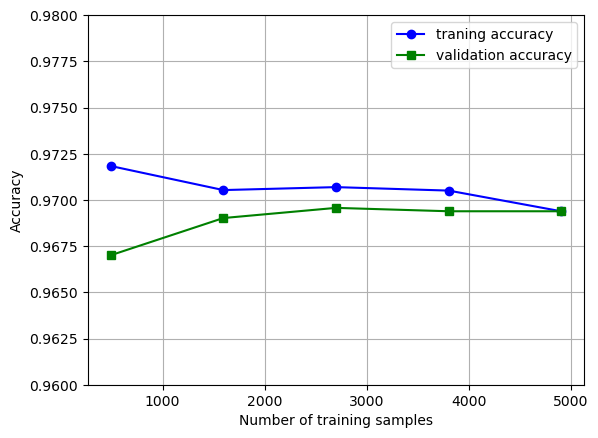

In [54]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_size, train_mean,
        color='blue', marker='o',
        label='traning accuracy')
plt.plot(train_size, test_mean,
        color='green',marker='s',
        label='validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.96,0.98])
plt.show()

## Validation curve 

In [55]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train, y=y_train,
                                             param_name='clf__C',
                                            param_range=param_range,
                                            cv=10)


In [ ]:
validation_curve?

In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        label='traning accuracy')
plt.plot(param_range, test_mean,
        color='green',marker='s',
        label='validation accuracy')
plt.grid()
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## GridSearchCV 

In [56]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe_svc = Pipeline([('sc', StandardScaler()), ('clf', SVC(random_state=1))])
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{
    'clf__C':param_range,
    'clf__kernel':['linear']
},{
    'clf__C':param_range,
    'clf__gamma':param_range,
    'clf__kernel':['rbf']
}]

gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='f1',
                 cv=10)

gs =gs.fit(X_train, y_train)

In [ ]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('f1-score : {}'.format(clf.score(X_train_test, y_train_test)))